In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

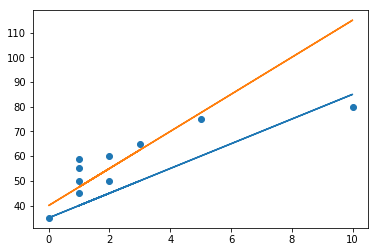

In [4]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [5]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [6]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [7]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

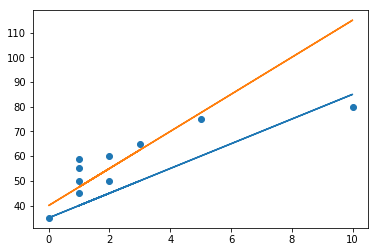

In [8]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [9]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [10]:
err1, err2

(9.4, -2.1)

In [11]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

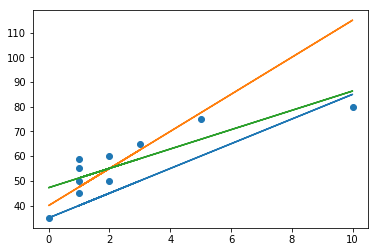

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.93749999999999

In [25]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

In [26]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [27]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.232143060499986

1. Подберите скорость обучения (alpha) и количество итераций:

In [29]:
n = X.shape[1]
#alpha = 3 * 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 1e-08)

In [30]:
iters = 500
alpha = 3 * 1e-2

In [32]:
for i in range(iters):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % (iters // 10) == 0:
        print(i, W, err)

0 [ 4.306 10.7  ] 3173.15
50 [38.47189272  5.52836149] 89.89492920920219
100 [45.43587625  4.24240866] 47.78566552757456
150 [46.86382304  3.97872736] 46.01520508600626
200 [47.15661983  3.92466019] 45.94076706688397
250 [47.21665706  3.91357386] 45.93763736200002
300 [47.22896753  3.91130063] 45.93750577530845
350 [47.23149177  3.91083451] 45.9375002428196
400 [47.23200935  3.91073894] 45.93750001020923
450 [47.23211548  3.91071934] 45.93750000042923


In [33]:
def calc_regression(X, y, iters=1000, alpha=1e-4, W = np.array([1, 0.5])):
    n = X.shape[1]
    err = []
    for i in range(iters):
        y_pred = np.dot(W, X)
        err.append(calc_mse(y, y_pred))
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    return W, err
    

In [34]:
alphas = np.logspace(-1.18, -3, 10)
alphas

array([0.06606934, 0.04147418, 0.02603488, 0.01634306, 0.01025914,
       0.00644004, 0.00404265, 0.00253772, 0.00159302, 0.001     ])

In [35]:
errors = []
for i_alpha in alphas:
    _, err = calc_regression(X, y, iters=500, alpha = i_alpha, W = np.array([1, 0.5]))
    errors.append(err)
    print(_, err[-1])

[47.17835809  3.61944681] 47.280092154951106
[47.23214285  3.91071429] 45.9375
[47.23209443  3.91072323] 45.93750000133203
[47.22377357  3.91225974] 45.93753897064981
[47.0253112   3.94890733] 45.96099755685339
[45.69940894  4.19374533] 47.21759679644494
[41.86517668  4.90176565] 61.554224332929515
[35.46457468  6.08368577] 120.77888955625909
[27.98149172  7.46549428] 245.83354835504423
[21.01880845  8.75120433] 416.12485014271545


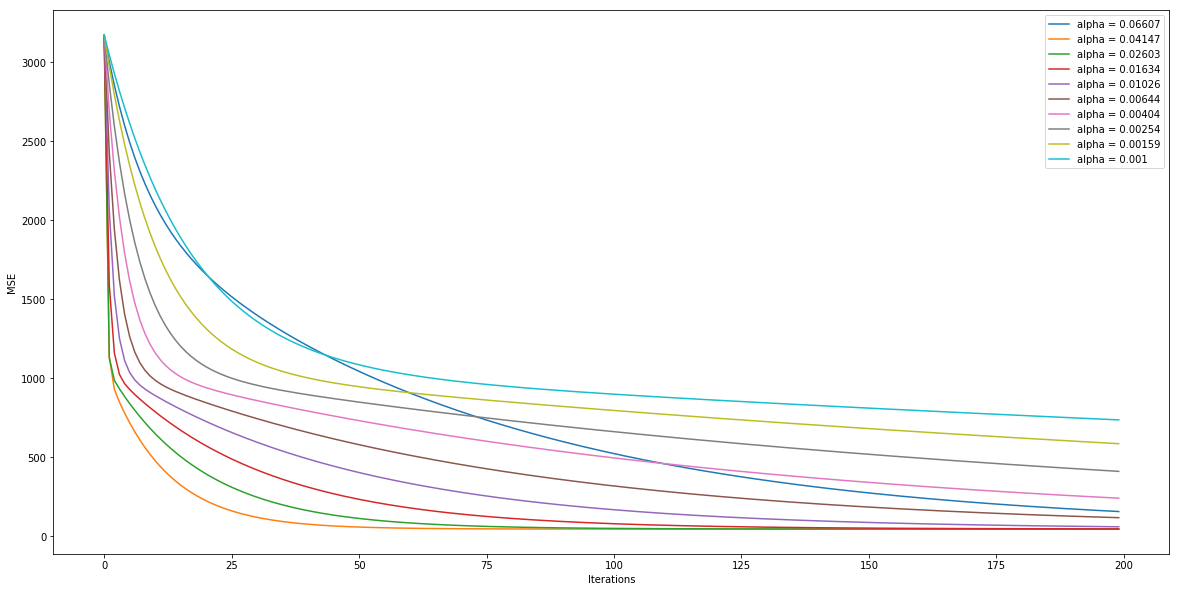

In [36]:
plt.figure(figsize=(20,10))
for i, err in enumerate(errors):
    plt.plot(err[:200], label=f'alpha = {str(round(alphas[i], 5))}')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

In [37]:
alphas = np.linspace(0.0635, 0.0585, 5)
alphas

array([0.0635 , 0.06225, 0.061  , 0.05975, 0.0585 ])

In [38]:
errors = []
for i_alpha in alphas:
    _, err = calc_regression(X, y, iters=100, alpha = i_alpha, W = np.array([1, 0.5]))
    errors.append(err)
    print(_, err[-1])

[47.18420892  3.91787656] 45.93894799830423
[47.17739941  3.92079792] 45.93934158505948
[47.16924907  3.92232779] 45.93992440110481
[47.1598934  3.9240557] 45.94069046795293
[47.14916191  3.92603735] 45.94169700180156


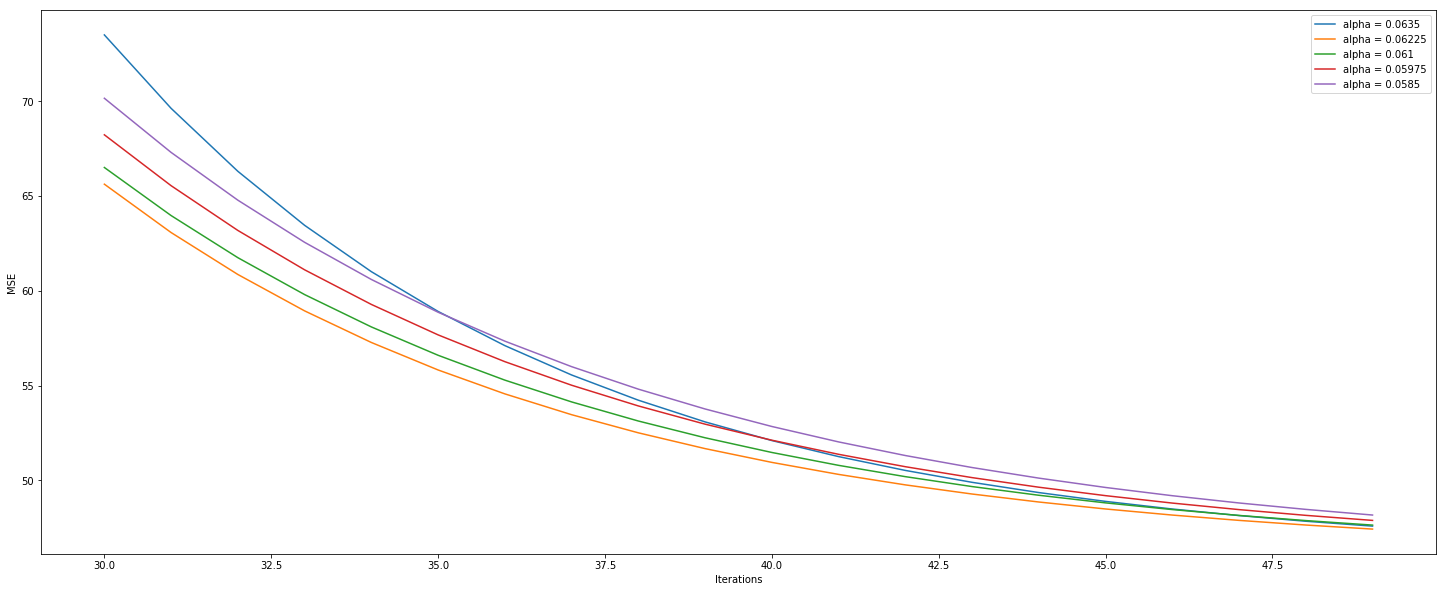

In [39]:
limits = (30, 50)
plt.figure(figsize=(25,10))
for i, err in enumerate(errors):
    plt.plot(list(range(*limits)), err[limits[0]:limits[1]], label=f'alpha = {str(round(alphas[i], 5))}')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

In [40]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [41]:
def calc_regression_error(X, y, iters=100, alpha=1e-4, W = np.array([1, 0.5])):
    n = X.shape[1]
    for i in range(iters):
        y_pred = np.dot(W, X)
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    err = calc_mse(y, y_pred)
    return err
    

In [57]:
SHAPE = 25

y_alphas = np.linspace(0.0555, 0.0635, SHAPE)
x_iters = np.linspace(25, 51, SHAPE).astype(int)


z = np.zeros((SHAPE,SHAPE))

for i, alpha in enumerate(y_alphas):
    for j, iters in enumerate(x_iters):
        z[i, j] = calc_regression_error(X, y, iters=iters, alpha=alpha, W = np.array([1, 0.5]))

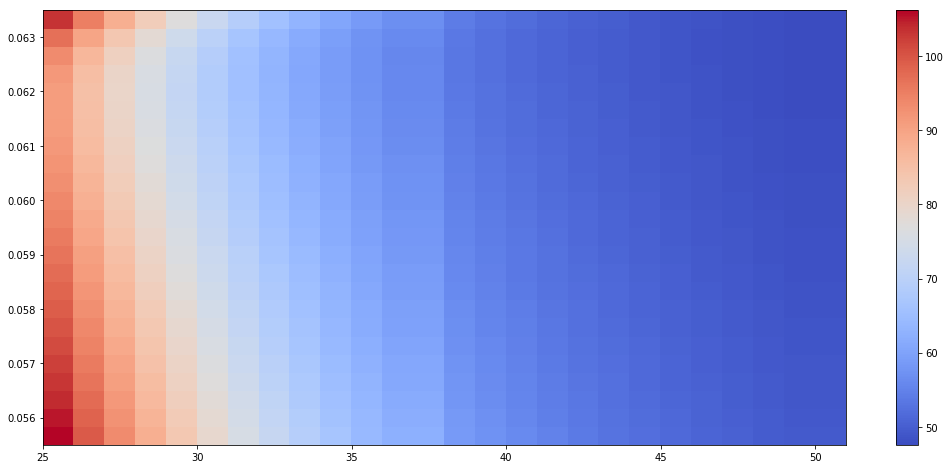

In [58]:
levels = MaxNLocator(nbins=50).tick_values(z.min(), z.max())
cmap = plt.get_cmap('coolwarm')
plt.figure(figsize=(18,8))
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(x_iters, y_alphas, z, cmap='coolwarm')
plt.colorbar()
plt.show()

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [45]:
n = X.shape[1]
#alpha = 3 * 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.06382634861905485)

In [46]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    if i % 100 == 0:
        print(i, W, err)

0 [ 8.03366362 22.20095853] 3173.15
100 [47.19007189  3.92303704] 45.93898771905823
200 [47.23209852  3.91072435] 45.93750000129057
300 [47.23214281  3.9107143 ] 45.9375
400 [47.23214286  3.91071429] 45.93750000000001
500 [47.23214286  3.91071429] 45.9375
600 [47.23214286  3.91071429] 45.9375
700 [47.23214286  3.91071429] 45.9375
800 [47.23214286  3.91071429] 45.9375
900 [47.23214286  3.91071429] 45.9375
